<a href="https://colab.research.google.com/github/scubasloth/MLF_1/blob/main/Assignment%20Data%20Analytics%20Foundations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import numpy as np
import pandas as pd



In [147]:
# Import dataset:
url = 'https://raw.githubusercontent.com/scubasloth/MLF_1/main/HouseQ1.csv'

# Assign column names to dataset:
names = ['PRICE_Bin','CNDTN','SALEYR_Bin','YR_RMDL2_Bin','QUALIFIED'   ]

# Convert dataset to a pandas dataframe:
df1 = pd.read_csv(url, names=names)

# Use head() function to return the first 5 rows:
#print(df1.head(5))
#df1.shape
# Assign values to the X and y variables
X = df1.iloc[:, :-1].values
y = df1.iloc[:, 4].values


two_class_index = np.logical_or(y == 0, y == 1)
simple_X = X[two_class_index]
simple_X = simple_X[:, 0:2]
simple_y = y[two_class_index]

# Impl-Note: more convenient to use +/-1, rather than 0/1 to represent the 
# class labels
simple_y[simple_y==0] = -1
# -- this is a common way to replace values in a numpy array





In [148]:
from sklearn.model_selection import train_test_split
simple_X_train, simple_X_valid, simple_y_train, simple_y_valid = \
    train_test_split(simple_X, simple_y)

In [149]:
class MyPerceptron:
    def __init__(self):
        """
        The constructor method of an object.
        """
        self.h = np.array([0, 1, 0], dtype=np.float)


    def compute_linear_score_with_(self, X, h):
        """
        Compute the linear function
        s[i] = <h, X[i]> + bias, <., .> represents inner product
        """
        s = None
        # insert your code here
        # HINT: the *last* element in an array is represented as a[-1]
        s = (X * h[:-1]).sum(axis=1) + h[-1]
        return s

    def predict_with_(self, X, h):
        # return 0/1 according to the linear score
        return np.sign(self.compute_linear_score_with_(X, h)).astype(np.int)

    def predict(self, X):
        return self.predict_with_(X, self.h)

    def fit(self, X, y):
        """
        :param X: training samples -- observed attribute values
        :param y: the known answer for each sample

        NOTE: now the "loss" has been encoded. You can try a customised one!
        """
        # Follow the tutorial of perpectron training
        ii = 0
        while True:
            # insert your code here
            
            # predict using the current h
            predicted = self.predict_with_(X, self.h)
            # find errors
            error_indexes = np.nonzero(predicted != y)[0]
            # `nonzero` returns the indexes for multiple dimension array,
            # Here only the indexes of the first (and only) dimension is 
            # concerned, therefore the [0]

            if len(error_indexes) > 0:
                i = error_indexes[np.random.randint(len(error_indexes))]
                self.h[:-1] += X[i] * float(y[i])
                # To update the weights
                self.h[-1] += float(y[i])
                # To update the b-bias
                #   This is equivalent to using the homogeneous representation
                #   of x, where the last element is one
                print(f"{ii} Train errors: {len(error_indexes)}")
                ii += 1
                
                # DEBUG
                # print(predicted)
                # print(y)
                # if ii>400: 
                #     break
                # ii += 1
            else:
                break # All the predictions are correct on the training data 
                # and there is nothing to adjust.
            

In [153]:
my_model = MyPerceptron() # initiate an object
my_model.fit(simple_X_train, simple_y_train)

0 Train errors: 17414
1 Train errors: 19143
2 Train errors: 17414
3 Train errors: 6497
4 Train errors: 19143
5 Train errors: 17414
6 Train errors: 15327
7 Train errors: 17414
8 Train errors: 6497
9 Train errors: 15975
10 Train errors: 6678
11 Train errors: 10364
12 Train errors: 19143
13 Train errors: 19134
14 Train errors: 6811
15 Train errors: 17414
16 Train errors: 6811
17 Train errors: 19143
18 Train errors: 19215
19 Train errors: 17414
20 Train errors: 17414
21 Train errors: 9515
22 Train errors: 17414
23 Train errors: 19215
24 Train errors: 18517
25 Train errors: 17414
26 Train errors: 13110
27 Train errors: 17414
28 Train errors: 6811
29 Train errors: 19129
30 Train errors: 17724
31 Train errors: 7723
32 Train errors: 18706
33 Train errors: 6497
34 Train errors: 19144
35 Train errors: 7012
36 Train errors: 19143
37 Train errors: 7012
38 Train errors: 19142
39 Train errors: 7700
40 Train errors: 17414
41 Train errors: 7048
42 Train errors: 19143
43 Train errors: 6495
44 Train err

KeyboardInterrupt: ignored

In [154]:
pred_valid = my_model.predict(simple_X_valid)
valid_corr_num = (pred_valid == simple_y_valid).sum()
print("Valid accu", valid_corr_num / len(simple_y_valid))

Valid accu 0.7268176596093878


In [121]:
print(type(df1.shape))
array1 = np.asarray(df1)
print(type(array1))

array1.shape

feature_names = ['PRICE_Bin']
target_names = ['QUALIFIED']



<class 'tuple'>
<class 'numpy.ndarray'>


In [ ]:
X_total, y_total = db['data'], db['target']
# take only two classes 0. sentosa, 1. versicolor and 2.virginica

In [ ]:
#X, y = array1['data'], array1['target']


#train, test = train_test_split(array1, test_size = 0.2, stratify = array1(['Qualified']), random_state=42)


In [150]:
import matplotlib.pyplot as plt
def viz_hypo(score_func, pred_func, X_samples, y_samples):
    """
    X_samples is to provide a range
    """
    # visualisation of the model behaviour
    x0_min, x1_min = np.min(X_samples, axis=0)
    x0_max, x1_max = np.max(X_samples, axis=0)

    xx, yy = np.meshgrid(np.arange(x0_min - 0.1, x0_max + 0.1, 0.02),
                        np.arange(x1_min - 0.1, x1_max + 0.1, 0.02))
    
    grid_coord = np.stack((xx.flatten(), yy.flatten())).T
    zz_c = pred_func(grid_coord).reshape(xx.shape)
    zz_v = score_func(grid_coord).reshape(xx.shape)

    fig1, ax1 = plt.subplots(constrained_layout=True)
    C = ax1.contourf(xx, yy, zz_v) 
    C2 = ax1.contour(xx, yy, zz_v, colors=('k', ), linewidths=2)
    ax1.clabel(C2, inline=True, fontsize=10)

    fig2, ax2 = plt.subplots(constrained_layout=True)
    C = ax2.contourf(xx, yy, zz_c) 
    C2 = ax2.contour(xx, yy, zz_c, colors=('k', ), linewidths=2)
    ax2.clabel(C2, inline=True, fontsize=10)

    # Draw the training samples
    ax1.scatter(X_samples[:, 0], X_samples[:, 1], c=y_samples, linewidth=1, edgecolor='k')
    ax2.scatter(X_samples[:, 0], X_samples[:, 1], c=y_samples, linewidth=1, edgecolor='k')
    plt.show()

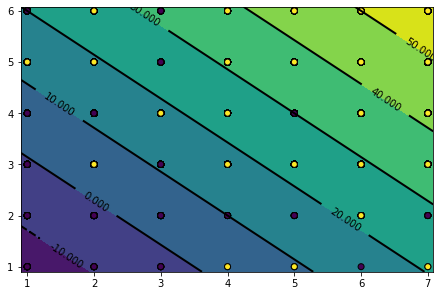

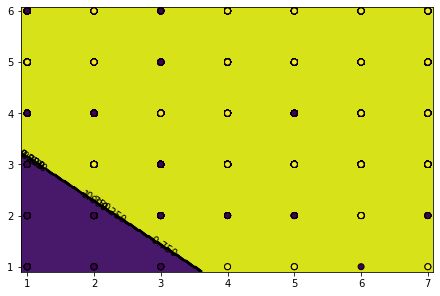

In [151]:
score_fn = lambda x:my_model.compute_linear_score_with_(x, my_model.h)
# The `lambda` defines an "anonymous function", which is a shortcut to write the 
# input-output correspondence without a formal definition
pred_fn = lambda x:my_model.predict(x)
viz_hypo(score_fn, pred_fn, simple_X_train, simple_y_train)

In [143]:
class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init weights
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update * 1


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self,x):
        return np.where(x>=0, 1, 0)


Perceptron classification accuracy 0.8288029541491435


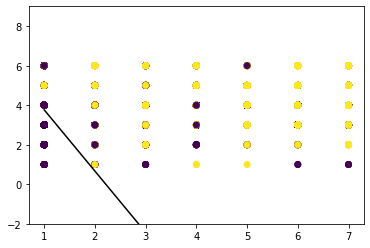

In [152]:
import matplotlib.pyplot as plt

#from perceptron import Perceptron

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

#X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2,cluster_std=1.05,random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

p = Perceptron(learning_rate=0.1, n_iters=10)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1],marker='o',c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0]) * x0_1 - p.bias / p.weights[1]
x1_2 = (-p.weights[0]) * x0_2 - p.bias / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()